# Лабороторная работа №6. Ласточкин Иван. 11 вариант

## Цель работы

Изучение принципов построения модели линейной одномерной регрессии.

## Общие сведения

[Мой датасет](https://www.kaggle.com/datasets/yasserh/student-marks-dataset) представляет собой информацию об оценках студентов включая данные о времени, затраченном на учебу, и количестве курсов, которые они изучают. В наборе данных содержится информация о 100 студентах, где каждый студент имеет три характеристики:

1. **number_courses**: Количество курсов, которые студент изучает.
2. **time_study**: Время, которое студент тратит на учебу.
3. **Marks**: Оценка студента.

Эти данные могут быть использованы для построения модели, предсказывающей оценки студентов на основе их времени, затраченного на учебу, и количества изучаемых курсов. Путем анализа этого датасета и построения модели можно попытаться выявить взаимосвязи между учебным временем, количеством курсов и полученными оценками, что может быть полезным для понимания факторов, влияющих на успеваемость студентов.

## Ход работы

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('/Users/vane4ka/Downloads/Student_Marks.csv')
dataset.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [16]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[4.508]
 [0.096]
 [3.133]
 [7.909]
 [7.811]]
Зависимая переменная
[19.202  7.734 13.811 53.018 55.299]


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, :])
X_without_nan = X.copy()
X_without_nan[:, :] = imputer.transform(X[:, :])
X_without_nan


array([[4.508],
       [0.096],
       [3.133],
       [7.909],
       [7.811],
       [3.211],
       [6.063],
       [3.413],
       [4.41 ],
       [6.173],
       [7.353],
       [0.423],
       [4.218],
       [4.274],
       [2.908],
       [4.26 ],
       [5.719],
       [6.08 ],
       [7.711],
       [3.977],
       [4.733],
       [6.126],
       [2.051],
       [4.875],
       [3.635],
       [1.407],
       [0.508],
       [4.378],
       [0.156],
       [1.299],
       [3.864],
       [1.923],
       [0.932],
       [6.594],
       [4.083],
       [7.543],
       [2.966],
       [7.283],
       [6.533],
       [7.775],
       [0.14 ],
       [2.754],
       [3.591],
       [1.557],
       [1.954],
       [2.061],
       [3.797],
       [4.779],
       [5.635],
       [3.913],
       [6.703],
       [4.13 ],
       [0.771],
       [6.049],
       [7.591],
       [2.913],
       [7.641],
       [7.649],
       [6.198],
       [7.468],
       [0.376],
       [2.438],
       [

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 4.92351402 24.55272899 19.40136996 18.18798775  6.55054926 37.81168735
 33.66412633 11.10624793 43.98890588 21.7619499  35.48419965 29.84748773
 43.21675356 25.69441135 20.9456746  23.43310813 13.43373563 22.17008756
 38.49007831 26.44450217 10.70914103 22.01014172 45.74279471 16.00941514
 13.48888937]


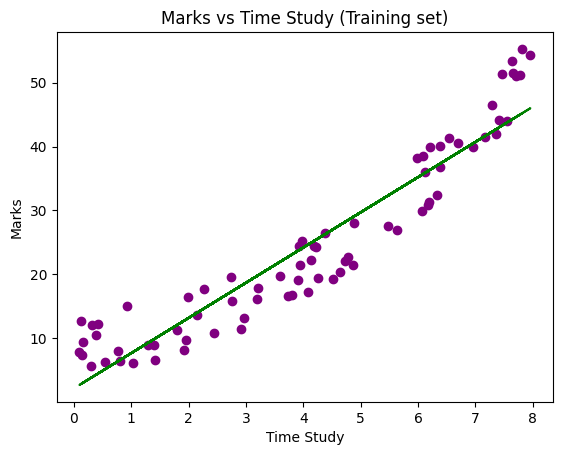

In [21]:
plt.scatter(X_train, y_train, color = 'purple')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Marks vs Time Study (Training set)')
plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.show()

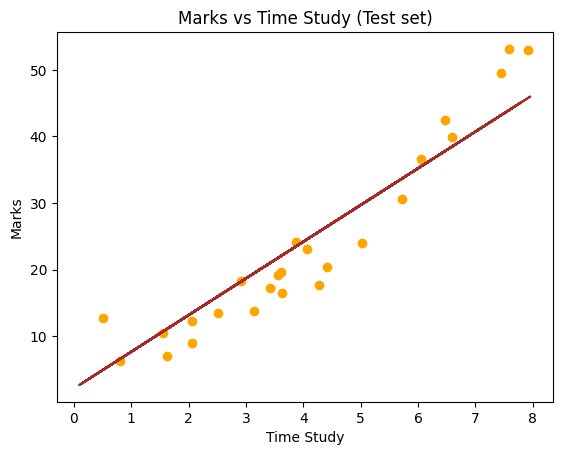

In [22]:
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'brown')
plt.title('Marks vs Time Study (Test set)')
plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.show()

In [23]:
Time = [[8]]

regressor.predict(Time)


array([46.24469372])

In [24]:
a = regressor.coef_
b = regressor.intercept_

In [25]:
# Можно использовать и так
Time = 8


Mark  = a * Time + b 
Mark

array([46.24469372])

## Контрольные вопросы 

1. **Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?**
   В линейной регрессии коэффициенты (веса) перед признаками вычисляются на основе отношения ковариации и дисперсии признаков. Поскольку изменение масштаба признаков просто изменит масштаб коэффициентов, но не изменит их отношения, масштабирование признаков обычно не требуется для линейных моделей.


2. **Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?**
   Квадратичное отклонение (Mean Squared Error, MSE) используется в линейной регрессии как функция потерь, так как она измеряет среднеквадратичное отклонение предсказанных значений от фактических. Это обеспечивает гладкую дифференцируемую функцию, что упрощает вычисления и обучение модели. Оптимизация MSE позволяет находить коэффициенты модели, минимизирующие сумму квадратов отклонений между предсказаниями и реальными значениями.


3. **Что именно реализовано в методе fit(X, y) класса LinearRegression?**
   Метод fit(X, y) в классе LinearRegression используется для обучения модели. Он принимает матрицу признаков X и вектор целевой переменной y и вычисляет коэффициенты (веса) модели, минимизируя сумму квадратов отклонений между предсказаниями и фактическими значениями.


4. **Поясните назначение метода predict класса LinearRegression.**
   Метод predict принимает матрицу признаков X и возвращает предсказанные значения целевой переменной на основе обученной модели. Он использует рассчитанные коэффициенты, чтобы выполнить предсказания для новых данных.


5. **По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?**
   Точность модели машинного обучения оценивается на тестовой подвыборке, которая не участвовала в обучении модели. Это позволяет оценить, насколько хорошо модель обобщает данные, которые она ранее не видела, и избежать переобучения, когда модель слишком адаптирована к тренировочным данным и не способна хорошо работать на новых данных. Тестовая подвыборка помогает оценить обобщающую способность модели.